In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

In [3]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')


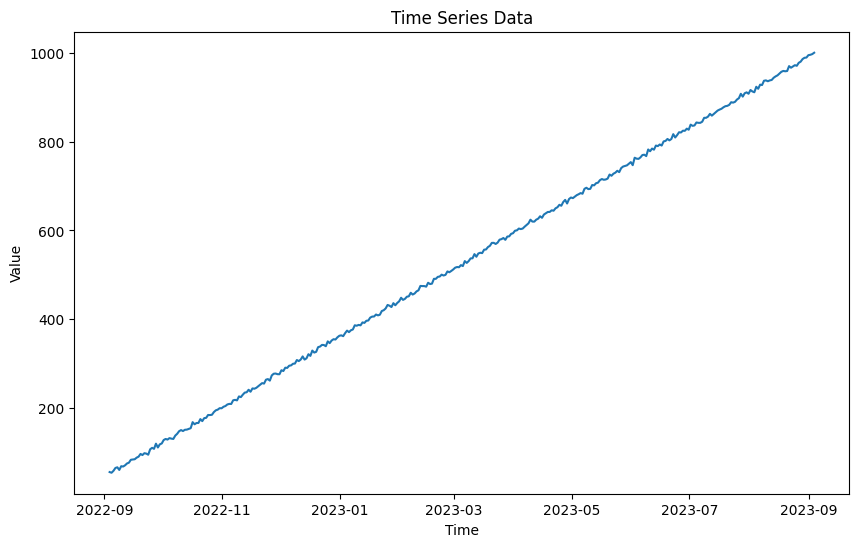

In [5]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['sales'])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [6]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Test Statistic (Estadística de Prueba): Este número (0.545414) es como el resultado de una operación que hicimos con los datos. En este caso, no es muy grande, ni muy pequeño, solo es un número que nos ayuda a entender los datos.
p-value (Valor p): Este número (0.986190) es como una probabilidad. Imagina que lanzas un dado y quieres saber la probabilidad de que salga un número en particular. Aquí, estamos buscando la probabilidad de que nuestros datos sean normales. Si es alto (cerca de 1), no hay nada especial en los datos.
#Lags Used (Número de Retardos Utilizados): Piensa en esto como cuántos pasos hacia atrás miramos al analizar los datos. En este caso, miramos 13 pasos hacia atrás.
Number of Observations Used (Número de Observaciones Utilizadas): Es cuántos datos estamos usando para hacer nuestros cálculos. En este caso, tenemos 352 piezas de información.
Critical Value (Valor Crítico): Estos son como las reglas del juego. Si tienes un valor más pequeño que estos números (-3.449065, -2.869786, -2.571163), entonces podríamos decir que hay algo especial en los datos. Son como límites que nos ayudan a decidir si nuestra torre (o datos) es lo suficientemente alta.

c:\Users\iansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\iansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\iansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Fri, 01 Dec 2023   AIC                           2104.453
Time:                        19:18:42   BIC                           2116.153
Sample:                    09-03-2022   HQIC                          2109.103
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2045.173      0.000       0.999       1.001
ma.L1         -0.9996      0.436     -2.291      0.022      -1.855      -0.144
sigma2        18.1320      8.063      2.249      0.0

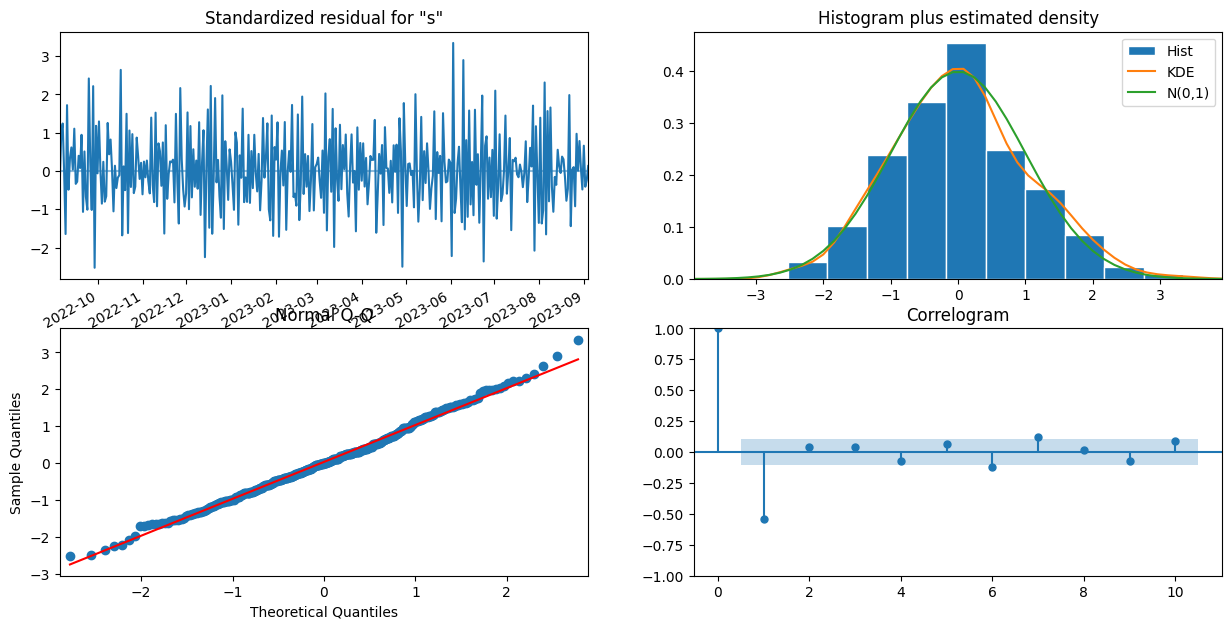

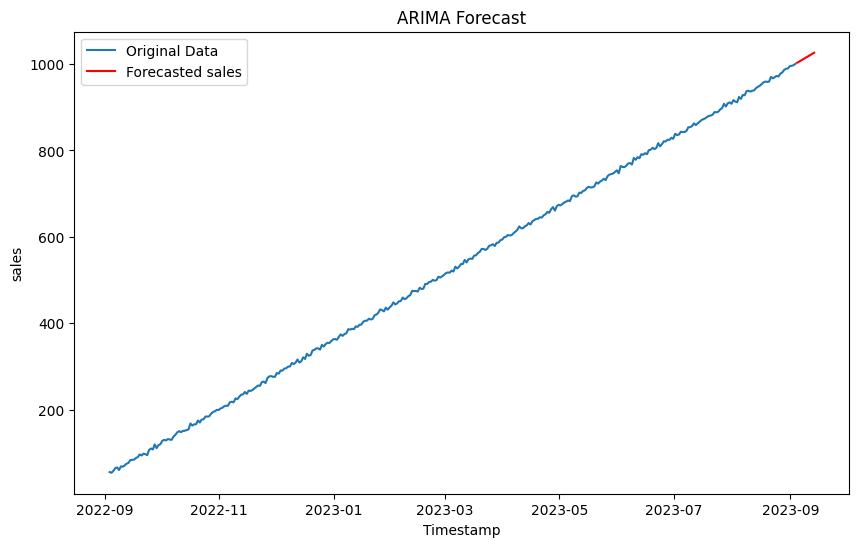

In [7]:
order = (1,1,1)
model = ARIMA(df['sales'], order=order)
results = model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future saless
# Example: forecast 10 steps ahead
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq=df.index.freq)[1:]
forecast_sales = forecast.predicted_mean

# Plot the original data and forecasted saless
plt.figure(figsize=(10, 6))
plt.plot(df['sales'], label='Original Data')
plt.plot(forecast_index, forecast_sales, color='red', label='Forecasted sales')
plt.title('ARIMA Forecast')
plt.xlabel('Timestamp')
plt.ylabel('sales')
plt.legend()
plt.show()

In [8]:
model = auto_arima(df, seasonal = False, trace = True, m = 7)

c:\Users\iansk\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.587 seconds


In [9]:
forecast = model.predict(20)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831668
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217253
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206408
2023-09-15 17:10:08.079328    1030.804239
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
Freq: D, dtype: float64